# 1 3 5 - Jack
# 2 4 - Jayden

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [12]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [13]:
train = pd.read_csv("./classify/TrainData1.txt", header=None, sep='\t')
target = pd.read_csv("./classify/TrainLabel1.txt",header=None, sep='\t')
train
test = pd.read_csv("./classify/TestData1.txt",header=None, sep='\t')

In [14]:
stats = train.describe().T



<Axes: xlabel='mean', ylabel='Count'>

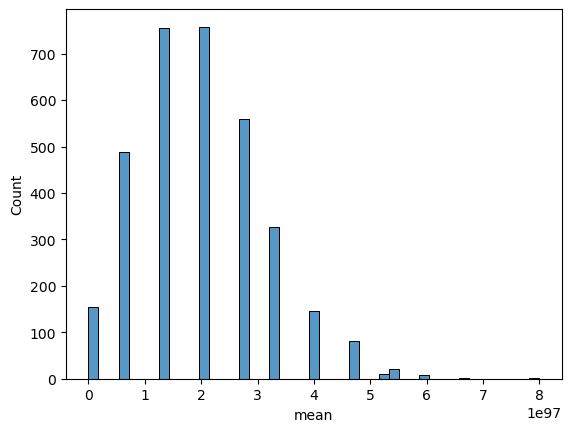

In [15]:
sns.histplot(stats['mean'])

<Axes: xlabel='std', ylabel='Count'>

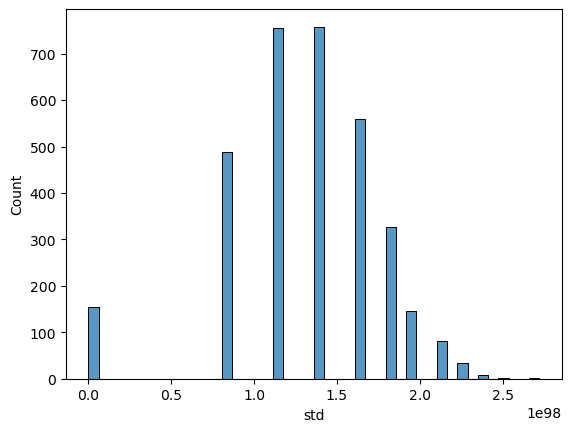

In [16]:
sns.histplot(stats['std'])

In [17]:
target.values.flatten()

array([1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1,
       4, 1, 1, 1, 3, 3, 1, 1, 4, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1,
       3, 1, 5, 1, 2, 5, 1, 3, 1, 1, 1, 2, 1, 1, 5, 3, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 4, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 2, 2, 1, 1, 1, 4, 1], dtype=int64)

In [18]:
print("Missing value count:",  train.isna().sum().sum())
print("Number of categories:",(len(target[0].unique())))


Missing value count: 0
Number of categories: 5


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
train_test_split

n=150
# do PCA dim reduction to 5
pca = PCA(n_components=n)
pca_evr = pca.fit(scale(train))

pca_evr = (pca.explained_variance_ratio_)



pca_evr = np.concatenate((np.zeros(1), pca_evr))
pca_evr

c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


array([0.00000000e+00, 1.37747810e-02, 1.14352342e-02, 1.01054184e-02,
       9.72062520e-03, 9.68315353e-03, 9.39044582e-03, 9.32933487e-03,
       9.30580463e-03, 9.10290359e-03, 9.08074620e-03, 8.97322678e-03,
       8.95521206e-03, 8.90595246e-03, 8.81125044e-03, 8.73827152e-03,
       8.70929260e-03, 8.68822614e-03, 8.63248673e-03, 8.59185761e-03,
       8.51480839e-03, 8.44791334e-03, 8.41934016e-03, 8.38184121e-03,
       8.34878258e-03, 8.29077850e-03, 8.22993420e-03, 8.18574960e-03,
       8.15910080e-03, 8.08278258e-03, 8.06428107e-03, 8.05498783e-03,
       7.99731903e-03, 7.95616322e-03, 7.86662546e-03, 7.83804970e-03,
       7.82307036e-03, 7.78674689e-03, 7.75193874e-03, 7.71135339e-03,
       7.68389728e-03, 7.64971591e-03, 7.59820910e-03, 7.54238464e-03,
       7.51140367e-03, 7.47225729e-03, 7.45140493e-03, 7.41590595e-03,
       7.39354905e-03, 7.37615892e-03, 7.30807760e-03, 7.29321525e-03,
       7.27237116e-03, 7.24474766e-03, 7.22324314e-03, 7.16455537e-03,
      

[0.         0.01377478 0.02521002 0.03531543 0.04503606 0.05471921
 0.06410966 0.07343899 0.0827448  0.0918477  0.10092845 0.10990167
 0.11885689 0.12776284 0.13657409 0.14531236 0.15402165 0.16270988
 0.17134237 0.17993422 0.18844903 0.19689695 0.20531629 0.21369813
 0.22204691 0.23033769 0.23856762 0.24675337 0.25491247 0.26299526
 0.27105954 0.27911452 0.28711184 0.29506801 0.30293463 0.31077268
 0.31859575 0.3263825  0.33413444 0.34184579 0.34952969 0.3571794
 0.36477761 0.37232    0.3798314  0.38730366 0.39475506 0.40217097
 0.40956452 0.41694068 0.42424876 0.43154197 0.43881434 0.44605909
 0.45328233 0.46044689 0.46760326 0.47470503 0.48176636 0.48881155
 0.49579876 0.50277393 0.50972188 0.51664704 0.52353971 0.53041767
 0.53728398 0.54410842 0.55088712 0.55764873 0.56435677 0.57105911
 0.5776817  0.5842875  0.59086528 0.5974146  0.60393819 0.6104263
 0.61689962 0.62334391 0.62972831 0.63609903 0.64243618 0.64874605
 0.65501618 0.66124541 0.66746646 0.67367207 0.67985472 0.686002

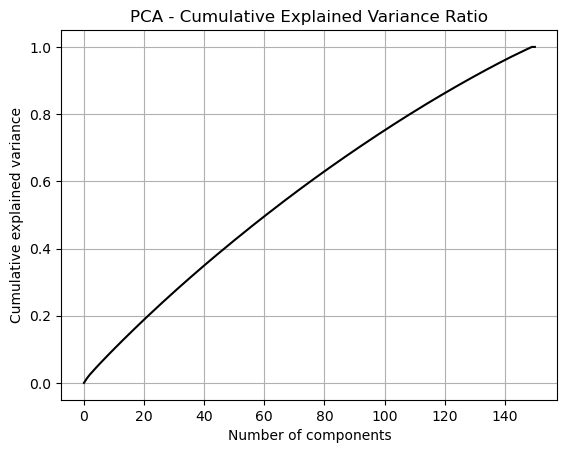

In [20]:
plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Cumulative Explained Variance Ratio")
plt.grid()
print(np.cumsum(pca_evr))

In [21]:

clf = Pipeline([
  # ('feature_selection', SelectFromModel(LinearSVC(tol=0.01))),
  ('classification', RandomForestClassifier())
])
clf.fit(train.values, target.values.flatten())

Pipeline(steps=[('classification', RandomForestClassifier())])

In [22]:
# Test Random Forest
scores = cross_val_score(clf, train.values, target.values.flatten(), cv=5)

c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [23]:
scores

array([0.86666667, 0.9       , 0.86666667, 0.93333333, 0.93333333])

In [24]:
clf.predict(test.values)

array([2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
       1, 3, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
clf.n_features_in_

3312

In [29]:

knn = KNeighborsClassifier(7, p=3000, weights='distance',n_jobs = -1)
knn.fit( MinMaxScaler(feature_range=(0, 1)).fit_transform(train.values), target.values)
score = cross_val_score(knn, MinMaxScaler(feature_range=(0, 1)).fit_transform(train.values), target.values.flatten(), cv=5)
score

c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\onedal\datatypes\validation.py:160: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.73333333, 0.73333333, 0.73333333, 0.7       , 0.7       ])